In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import time

## **DATA LOADING AND SCALING**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fatemehmehrparvar/obesity-levels")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fatemehmehrparvar/obesity-levels/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/ObesityDataSet.csv")


# Display the column names
print("Columns in the dataset:")
print(data.columns)
data.info()

print(data.shape[0], "samples")

data.isnull().sum() # check if there are null values


data = data.dropna()
print(data.shape[0], "complete samples")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in the dataset:
Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                           

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


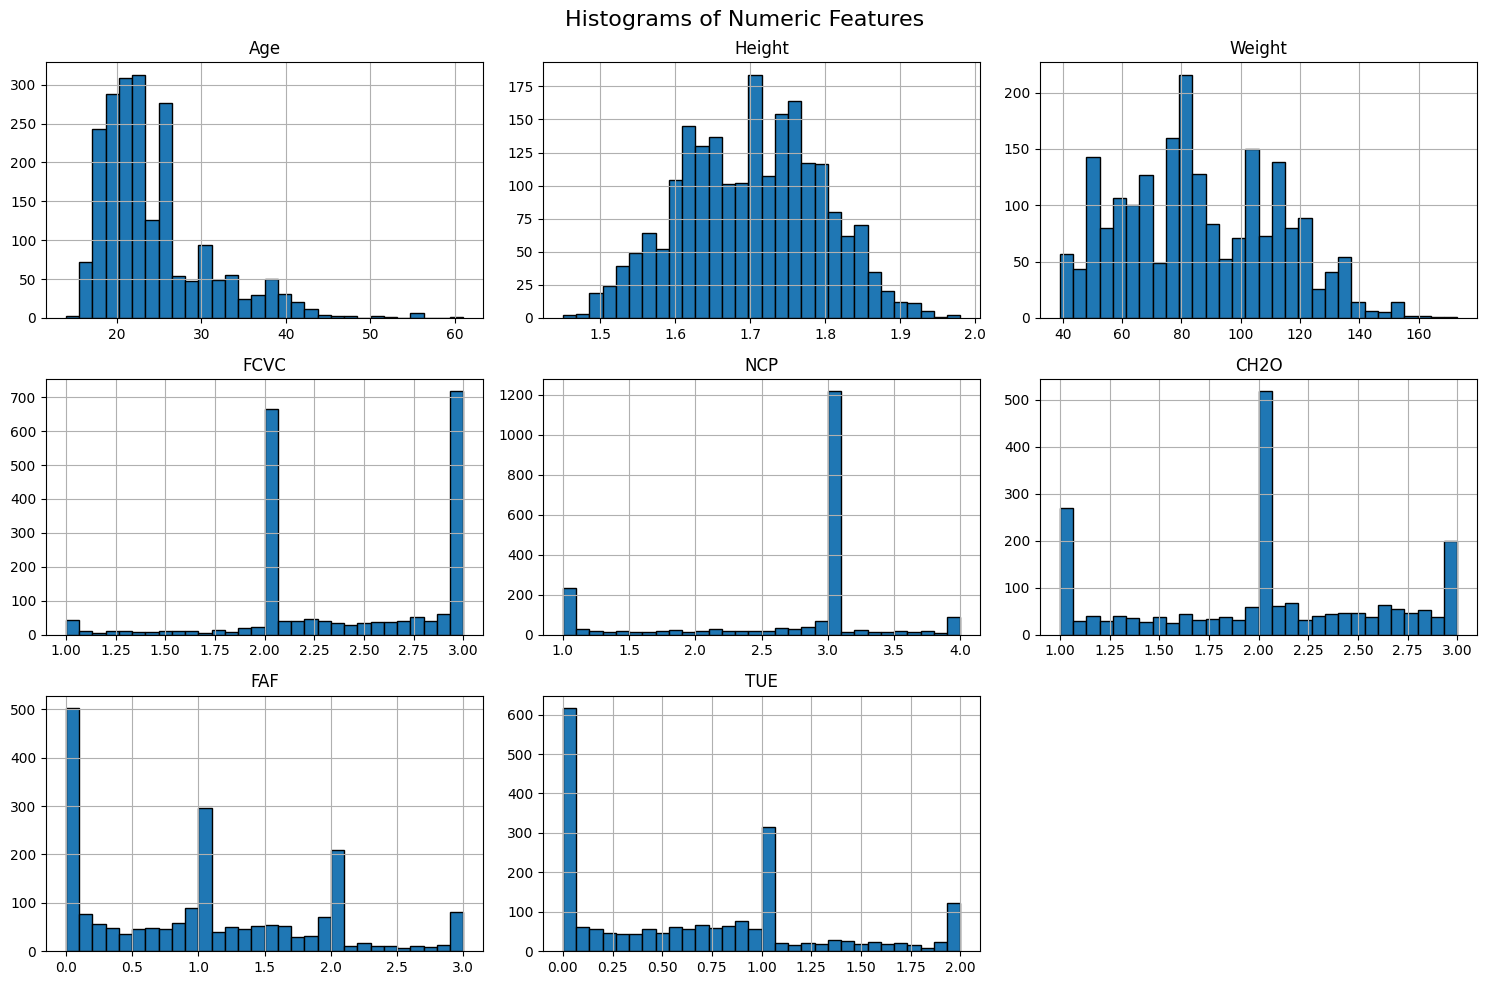

In [ ]:
# Plot histograms for numeric features
data.select_dtypes(include=[np.number]).hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

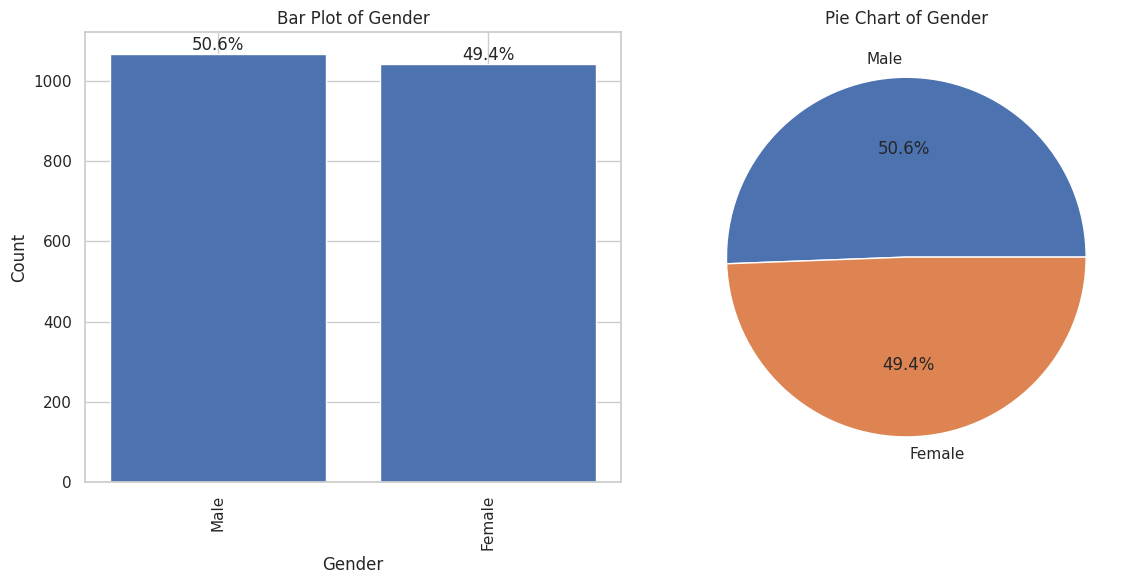


Counts for Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64


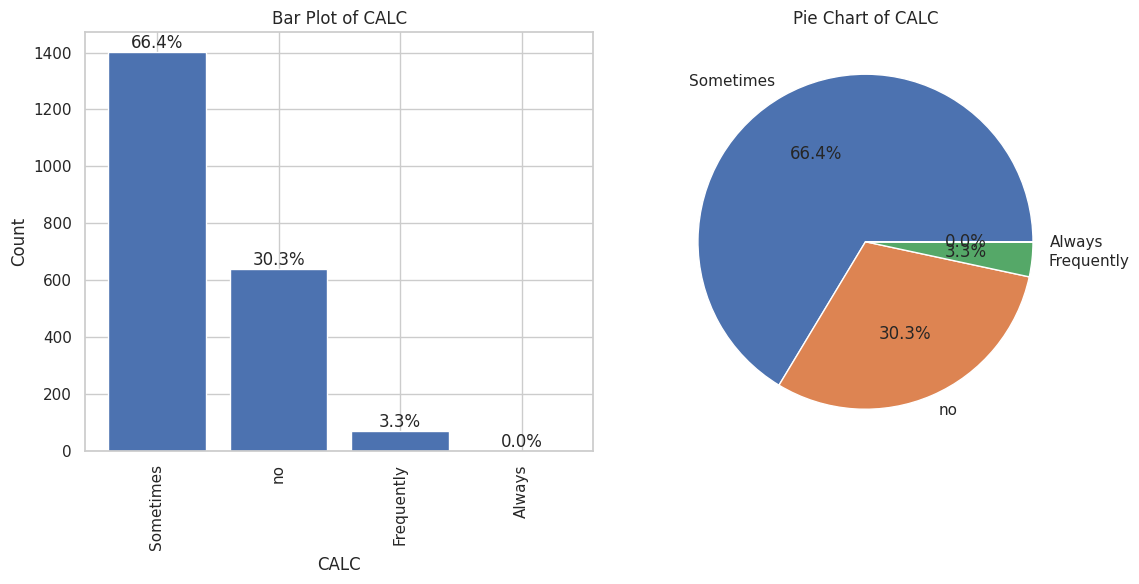


Counts for CALC:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


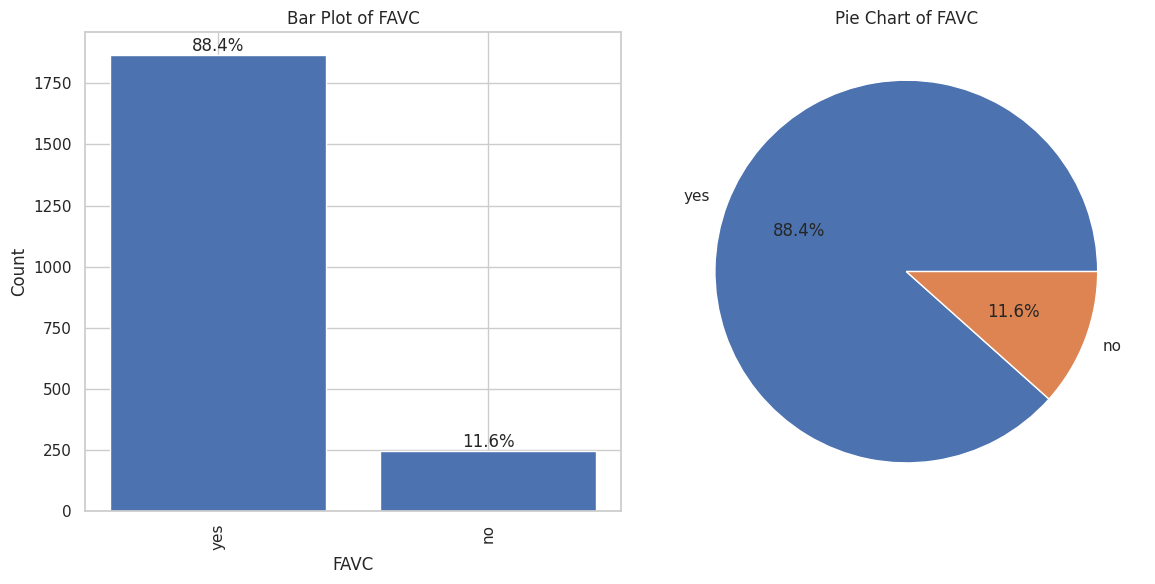


Counts for FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64


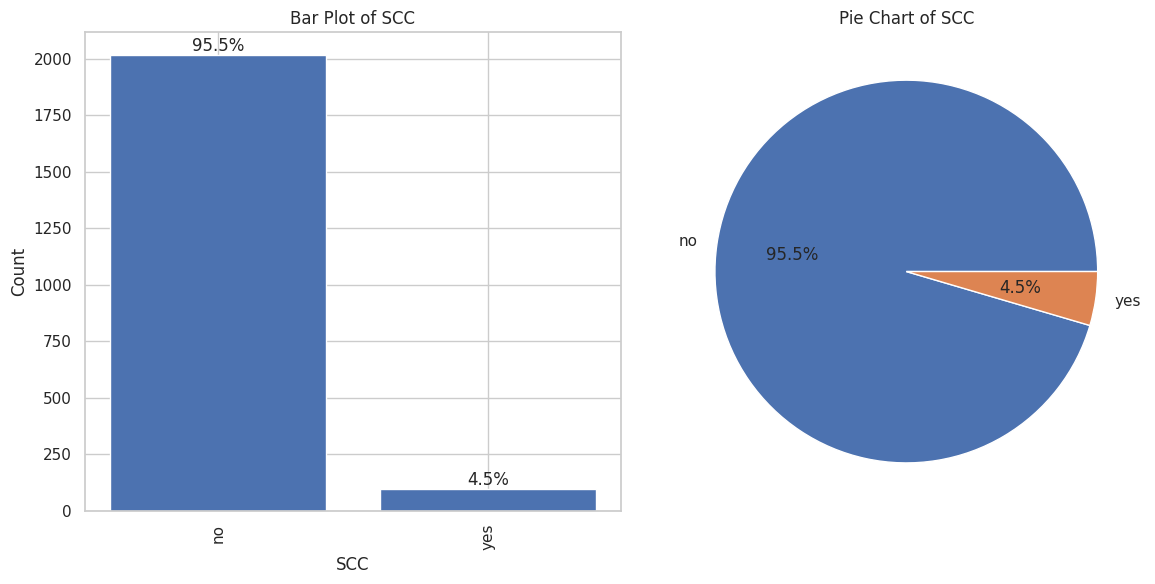


Counts for SCC:
SCC
no     2015
yes      96
Name: count, dtype: int64


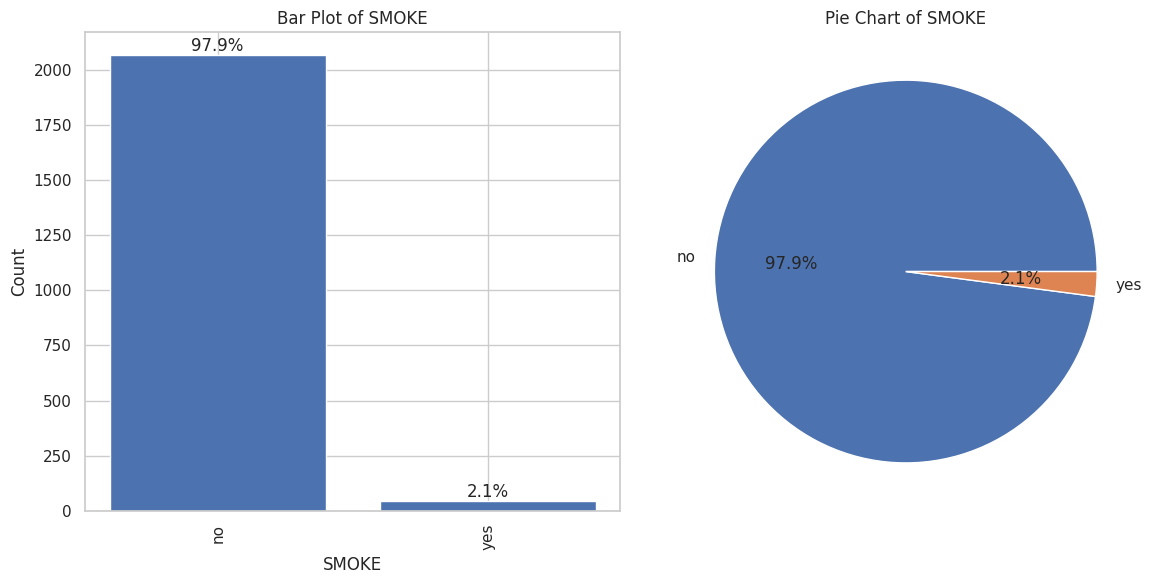


Counts for SMOKE:
SMOKE
no     2067
yes      44
Name: count, dtype: int64


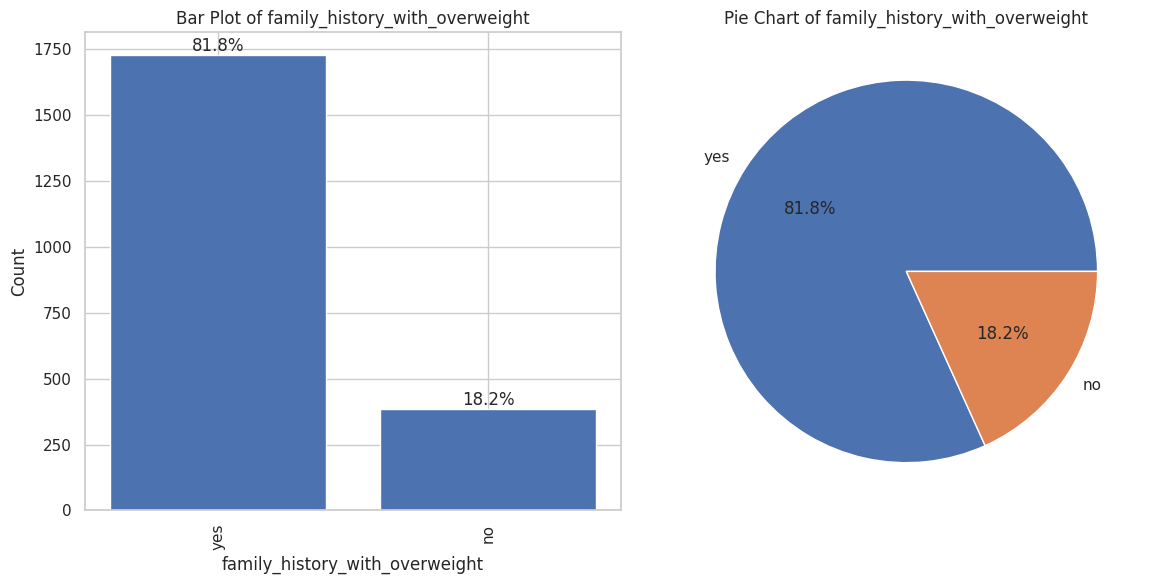


Counts for family_history_with_overweight:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


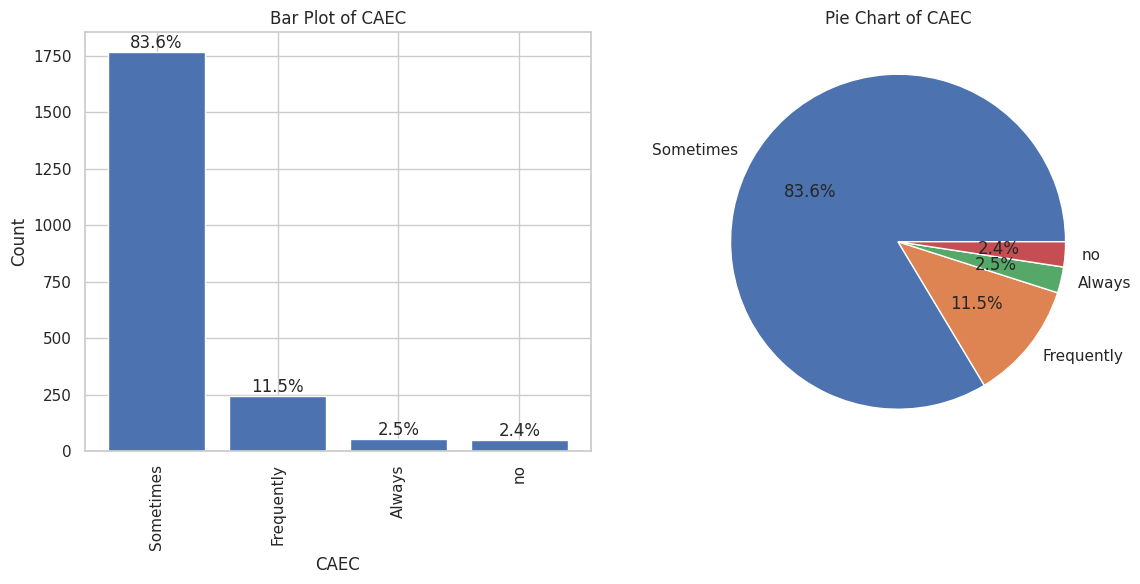


Counts for CAEC:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


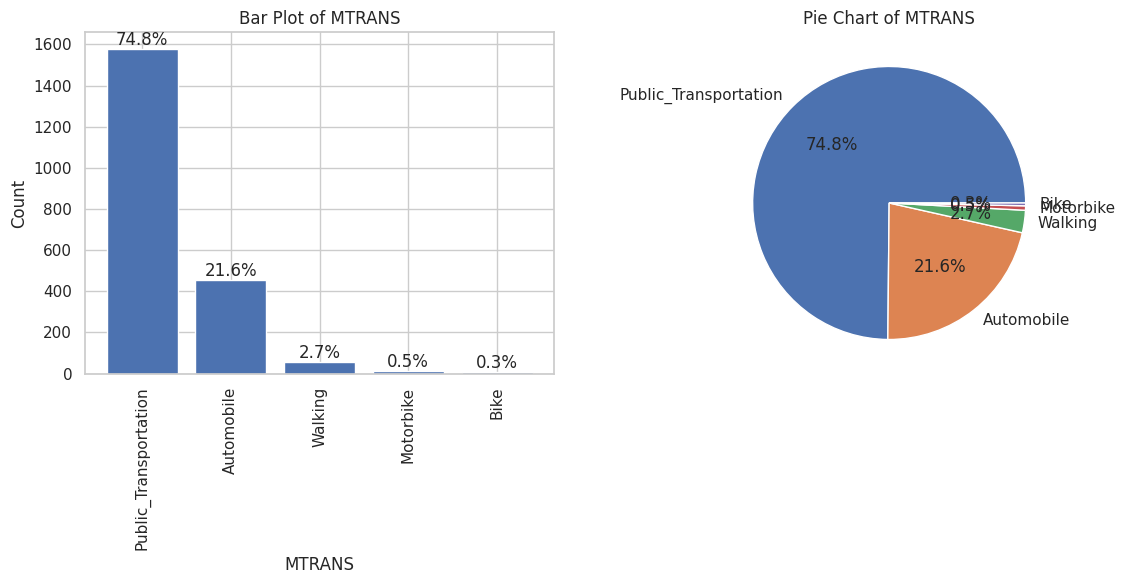


Counts for MTRANS:
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


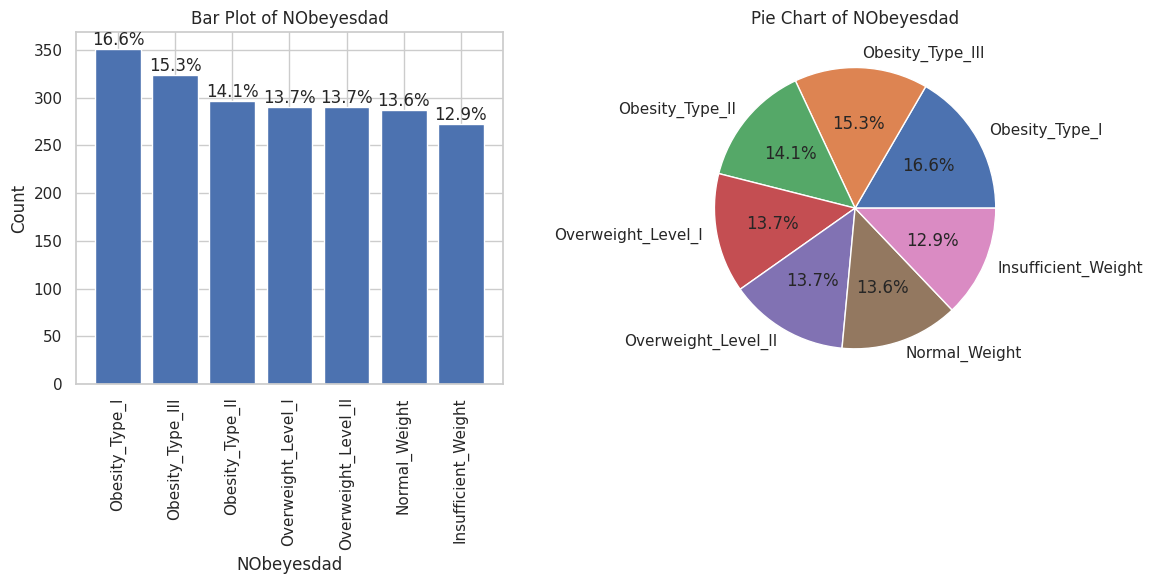


Counts for NObeyesdad:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [ ]:
# Plot for non-numerical features
data_object = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

for col in data_object:
    plt.figure(figsize=(12, 6))

    # Bar plot
    plt.subplot(1, 2, 1)
    value_counts = data[col].value_counts()
    bars = plt.bar(value_counts.index, value_counts.values)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)

    total = value_counts.sum()
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{(height/total)*100:.1f}%', ha='center', va='bottom')

    # Pie plot
    plt.subplot(1, 2, 2)
    plt.pie(labels=value_counts.index, x=value_counts.values, autopct='%1.1f%%')
    plt.title(f"Pie Chart of {col}")

    plt.tight_layout()
    plt.show()

    print(f"\nCounts for {col}:")
    print(value_counts)

In [ ]:
# Display the object columns
object_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Columns with object type:")
print(object_columns)

Columns with object type:
['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


**ENCODE OBJECT COLUMNS**

In [ ]:
le=LabelEncoder()
data_object = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]
for column in data_object:
    data[column]=le.fit_transform(data[column])


**ENCODE OBJECT COLUMNS**
**ONE-HOT ENCODING FOR MTRANS FEATURE **

In [ ]:
le = LabelEncoder()

data_object = ["Gender", "CALC", "FAVC", "SCC", "SMOKE",
               "family_history_with_overweight", "CAEC", "NObeyesdad"]

# Encode categorical columns
for column in data_object:
    data[column] = le.fit_transform(data[column])

# Use one-hot encoding for MTRANS
data = pd.get_dummies(data, columns=['MTRANS'], drop_first=False)

# Convert boolean columns from one-hot encoding to 0 and 1
mtrans_columns = [col for col in data.columns if col.startswith('MTRANS')]
for col in mtrans_columns:
    data[col] = data[col].astype(int)

data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,...,1,0.0,1.0,2,1,0,0,0,1,0
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,...,1,3.0,0.0,2,1,0,0,0,1,0
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,...,1,2.0,1.0,2,1,0,0,0,1,0
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,...,0,2.0,0.0,2,5,0,0,0,0,1
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,...,0,0.0,0.0,2,6,0,0,0,1,0


In [ ]:
data.info()
print(data.shape[0], "complete samples")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

**SCALING**

<ipython-input-45-ed556312bc5e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.select_dtypes(include=np.number).hist(ax =ax)


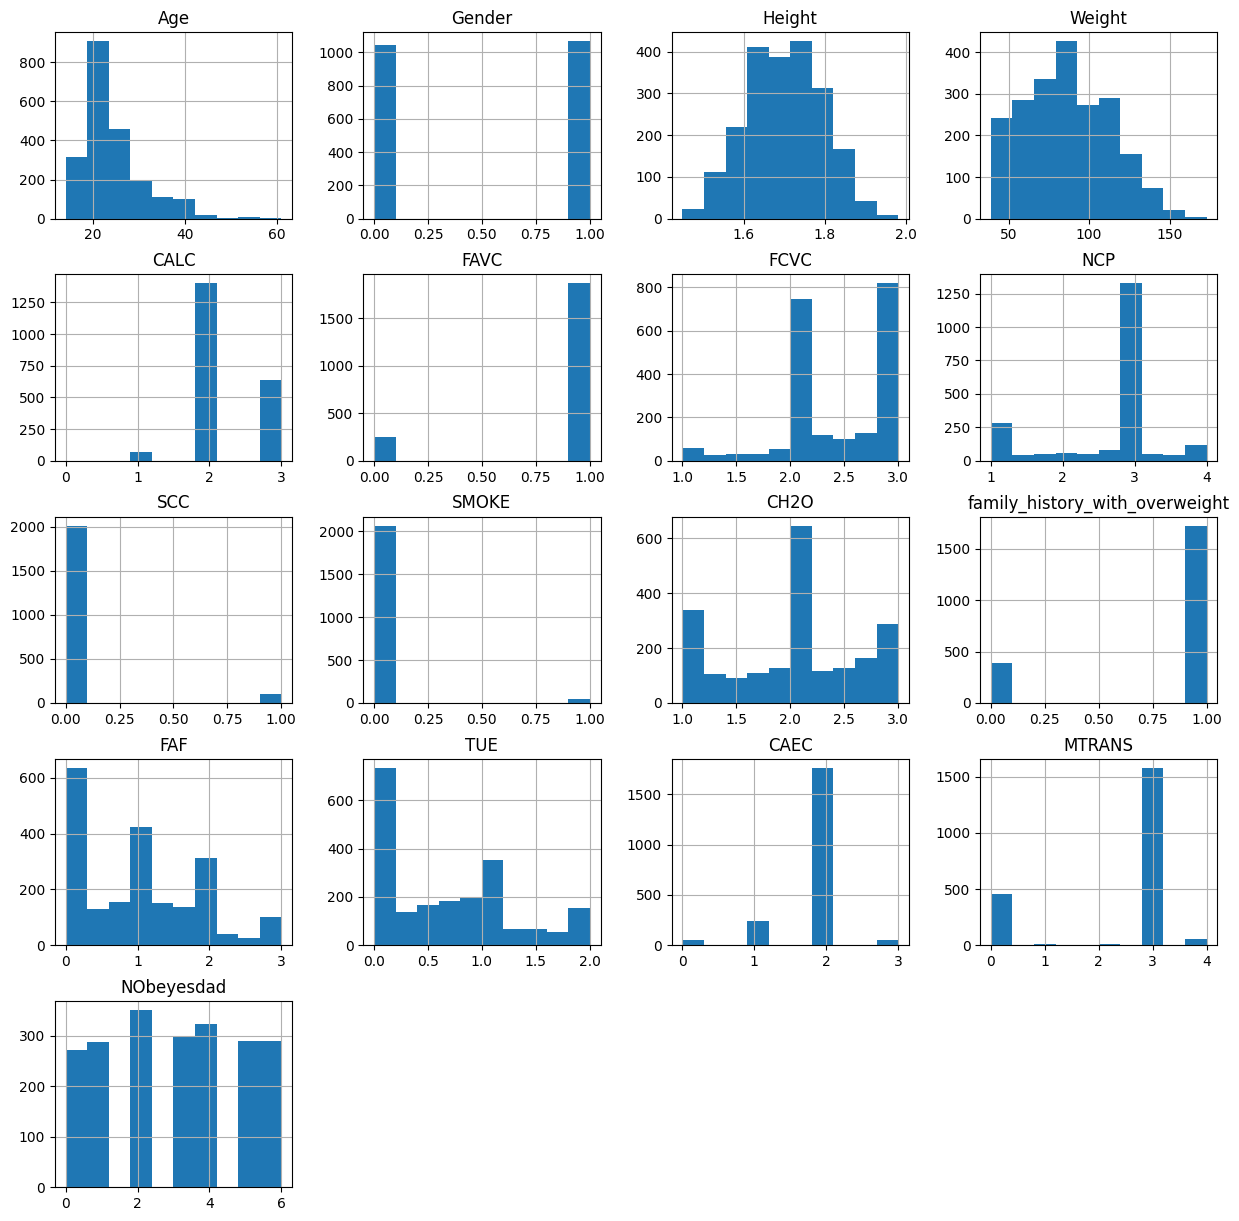

In [ ]:
# plot of the rage of each column before the scaling
fig = plt.figure(figsize = (15,15))
ax = plt.axes()
data.select_dtypes(include=np.number).hist(ax =ax)
plt.show()

In [ ]:
scaler=StandardScaler()
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape Weight and apply Min-Max Scaling
data["Weight"] = min_max_scaler.fit_transform(data["Weight"].values.reshape(-1, 1))

data.loc[data["Age"]<=22,"Age"]=0
data.loc[(data["Age"]>22) & (data["Age"]<=26),"Age"]=1
data.loc[(data["Age"]>26) & (data["Age"]<=36),"Age"]=2
data.loc[(data["Age"]>36) & (data["Age"]<=46),"Age"]=3
data.loc[(data["Age"]>46) & (data["Age"]<=56),"Age"]=4
data.loc[data["Age"]>56,"Age"]=5




<ipython-input-273-7472ff30fddc>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.select_dtypes(include=np.number).hist(ax =ax)


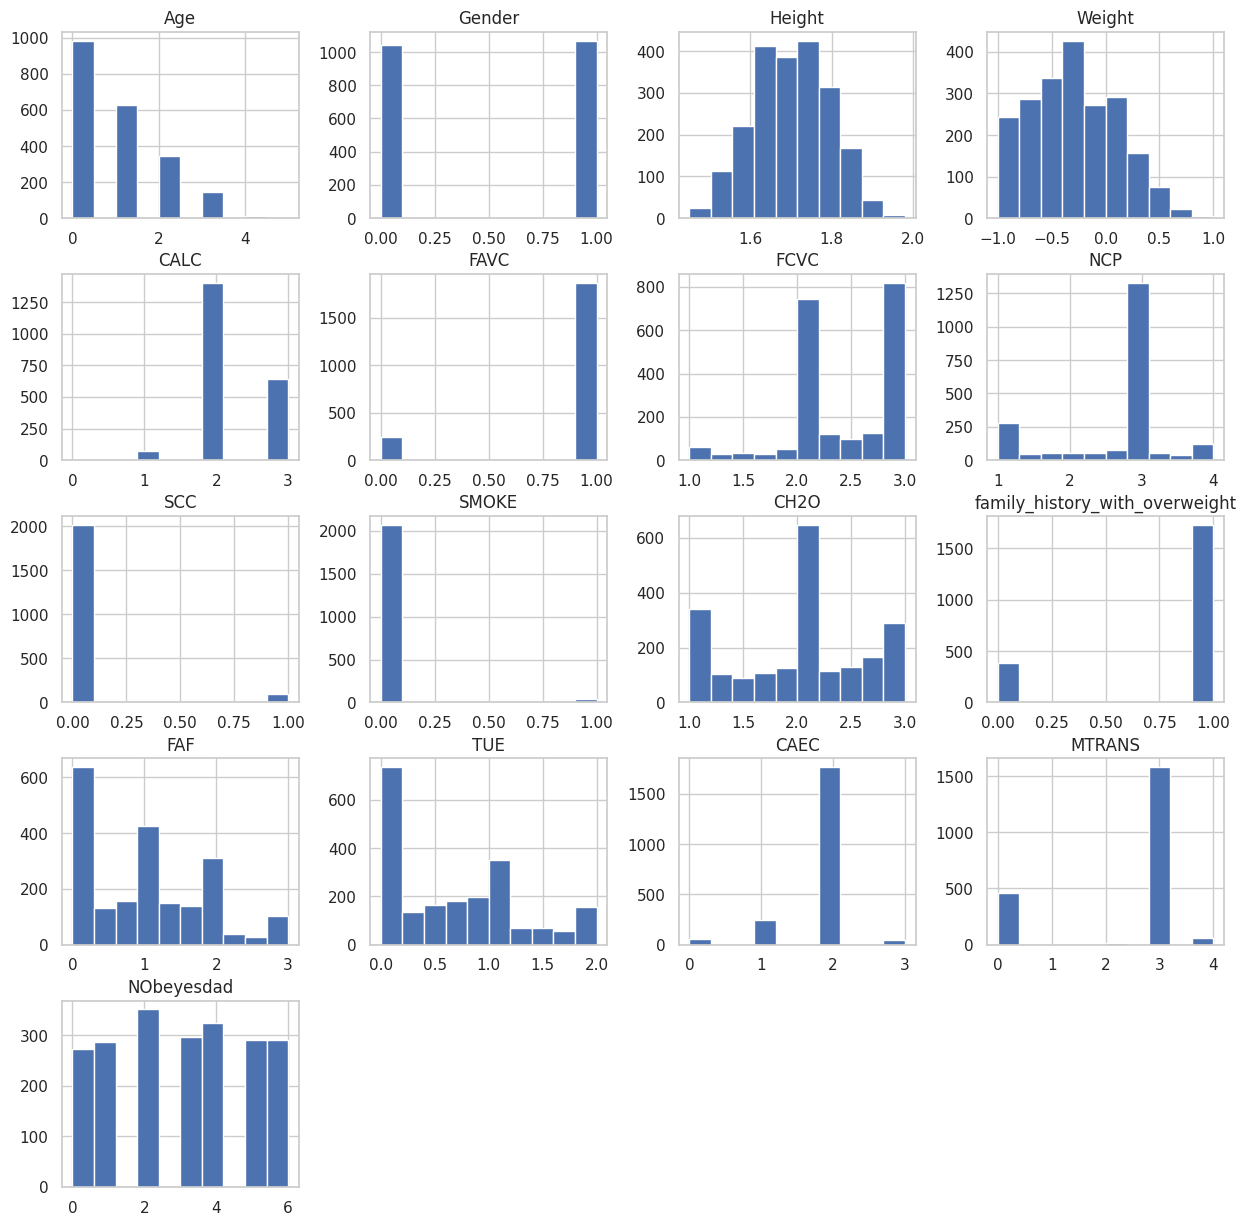

In [ ]:
# plot of the rage of each column after the scaling
fig = plt.figure(figsize = (15,15))
ax = plt.axes()
data.select_dtypes(include=np.number).hist(ax =ax)
plt.show()

**FEATURE** **SELECTION**

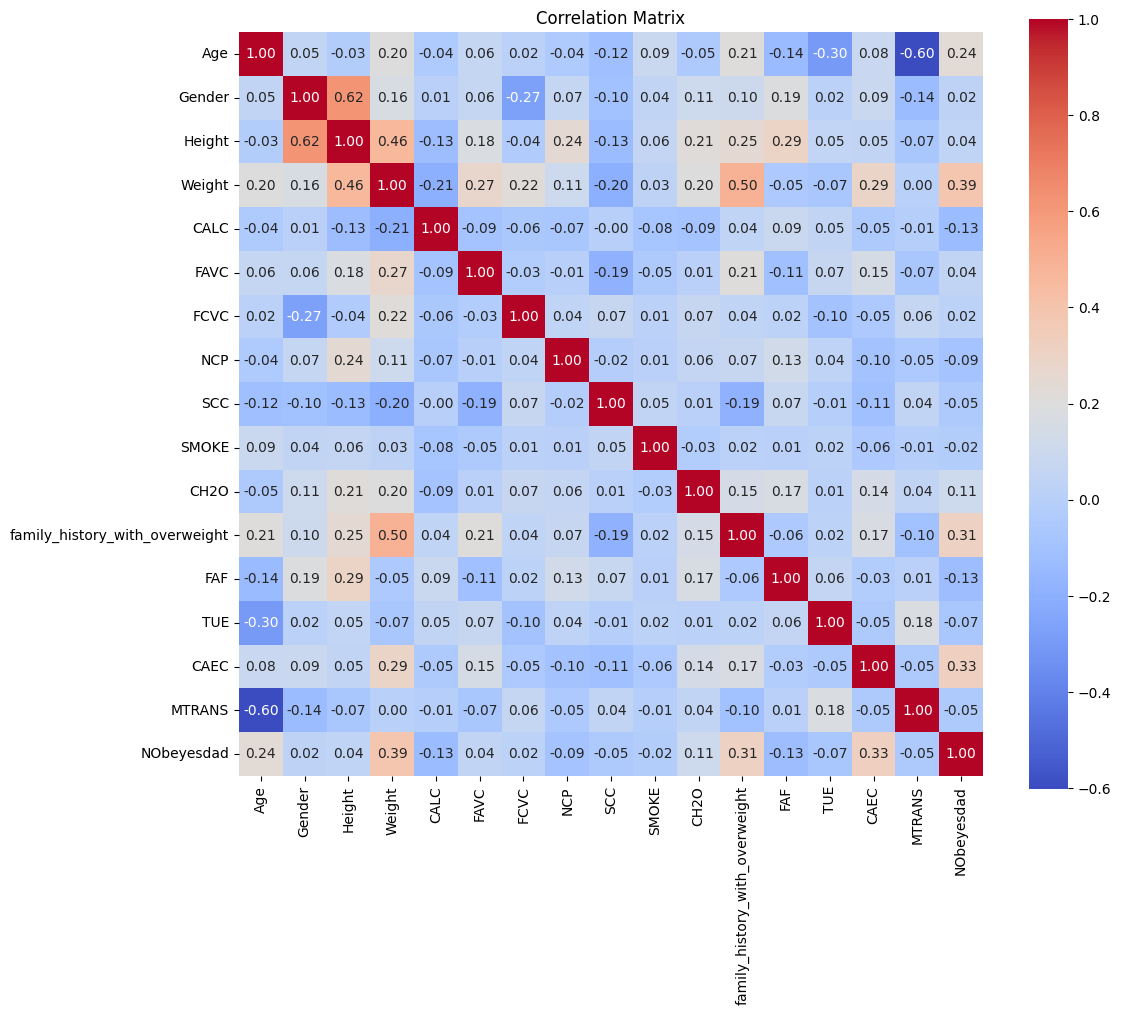

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()


plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
features_to_keep = ['Age', 'Weight', 'NCP', 'CALC', 'CH2O',
                    'family_history_with_overweight', 'FAF', 'TUE',
                    'CAEC', 'NObeyesdad']

#features_to_keep = ['Age', 'Weight','NObeyesdad']


# Keep only the specified features in the DataFrame
data_filtered = data[features_to_keep].copy()

**TRAIN AND TEST**

In [ ]:
# seperate the target column from the data
obesity = data["NObeyesdad"]
data = data.drop(columns=["NObeyesdad"])
#data = data_filtered.drop(columns=["NObeyesdad"])
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,0,0,0,1,0
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,0,0,0,1,0
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,0,0,0,1,0
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,0,0,0,0,1
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,0,0,0,1,0


In [ ]:
# create test(40%) and train set(60%)
X_train, X_test, y_train, y_test = train_test_split(data, obesity, test_size=0.4, random_state=42)
print(X_train.shape[0], "samples in train set")
print(X_test.shape[0], "samples in test set")

1266 samples in train set
845 samples in test set


Training Set - Class Distribution:
Class 3: 178 examples
Class 4: 186 examples
Class 1: 165 examples
Class 5: 178 examples
Class 6: 179 examples
Class 0: 166 examples
Class 2: 214 examples

Testing Set - Class Distribution:
Class 0: 106 examples
Class 4: 138 examples
Class 1: 122 examples
Class 3: 119 examples
Class 5: 112 examples
Class 2: 137 examples
Class 6: 111 examples


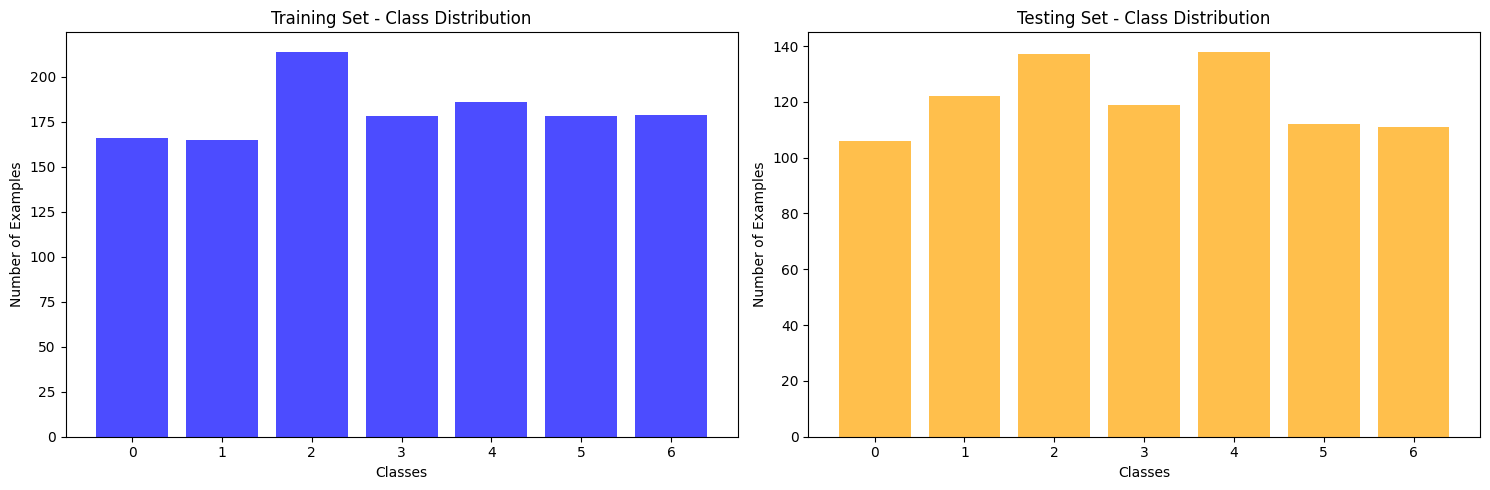

In [ ]:
from collections import Counter

# check the distribution of the classes in the test and train set
train_class_count = Counter(y_train)
print("Training Set - Class Distribution:")
for label, count in train_class_count.items():
    print(f"Class {label}: {count} examples")

test_class_count = Counter(y_test)
print("\nTesting Set - Class Distribution:")
for label, count in test_class_count.items():
    print(f"Class {label}: {count} examples")


train_labels = list(train_class_count.keys())
train_values = list(train_class_count.values())
test_labels = list(test_class_count.keys())
test_values = list(test_class_count.values())

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training set class distribution
axs[0].bar(train_labels, train_values, color='blue', alpha=0.7)
axs[0].set_title('Training Set - Class Distribution')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Number of Examples')
axs[0].set_xticks(train_labels)

# Plot testing set class distribution
axs[1].bar(test_labels, test_values, color='orange', alpha=0.7)
axs[1].set_title('Testing Set - Class Distribution')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Number of Examples')
axs[1].set_xticks(test_labels)

plt.tight_layout()
plt.show()


## **1 & 3-NEAREST NEIGHBOR CLASSIFIERS**


Evaluation metrics for KNN (k=1):
Training Time (seconds): 0.002886056900024414
Accuracy: 0.8899408284023669
Precision (weighted): 0.8911
Recall (weighted): 0.8899
F1-Score (weighted): 0.8840
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       106
           1       0.86      0.54      0.66       122
           2       0.93      0.93      0.93       137
           3       0.96      0.97      0.97       119
           4       0.97      1.00      0.99       138
           5       0.80      0.95      0.87       112
           6       0.85      0.88      0.87       111

    accuracy                           0.89       845
   macro avg       0.89      0.89      0.88       845
weighted avg       0.89      0.89      0.88       845


Evaluation metrics for KNN (k=3):
Training Time (seconds): 0.003652334213256836
Accuracy: 0.8674556213017751
Precision (weighted): 0.8684
Recall (weighted): 0.8675
F1-Score (weighted): 

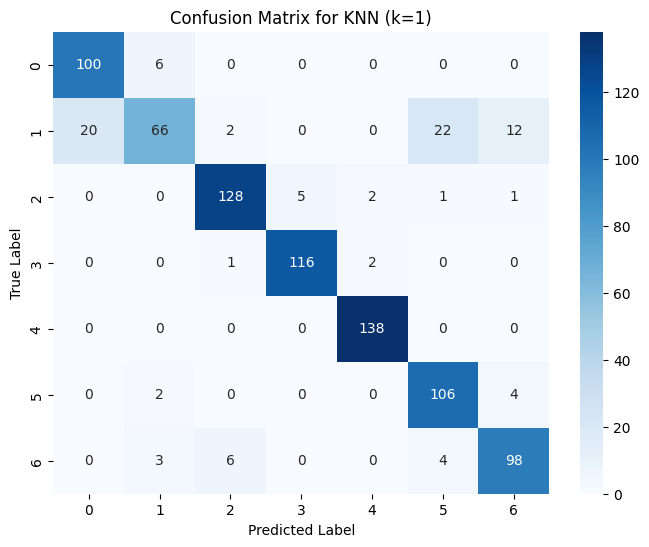

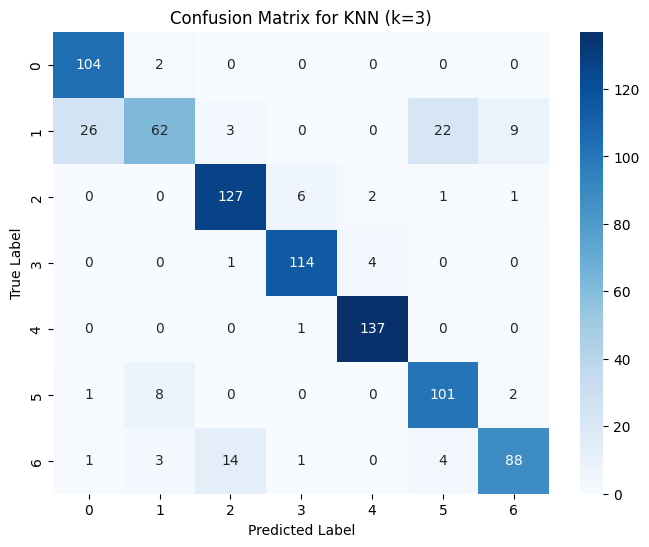

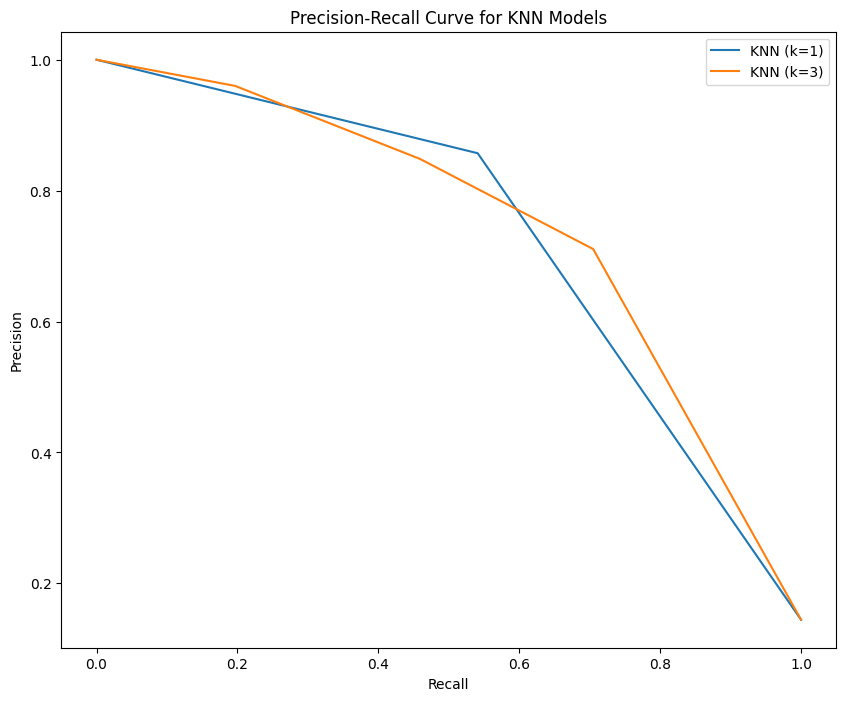

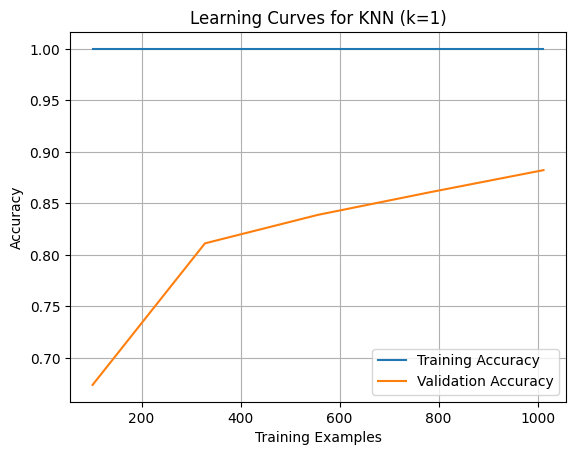

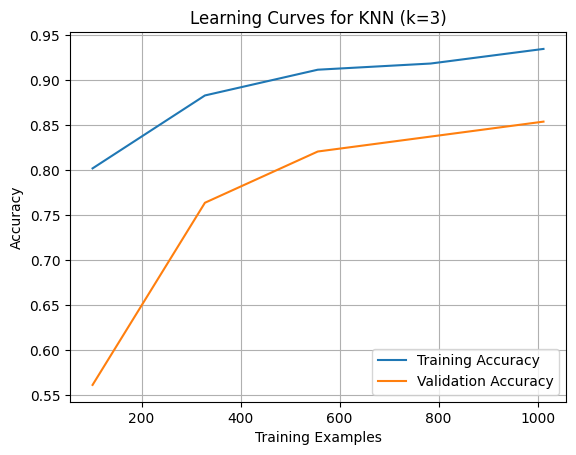

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.model_selection import learning_curve

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)

def train_model(model, X_train, y_train):
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time
    return training_time


train_time_1 = train_model(knn_1, X_train, y_train)
train_time_3 = train_model(knn_3, X_train, y_train)

# Make predictions
y_pred_1 = knn_1.predict(X_test)
y_pred_3 = knn_3.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name, training_time):
    print(f"\nEvaluation metrics for {model_name}:")
    print("Training Time (seconds):", training_time)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_1, "KNN (k=1)", train_time_1)
evaluate_model(y_test, y_pred_3, "KNN (k=3)", train_time_3)

# Confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

cm_1 = confusion_matrix(y_test, y_pred_1)
cm_3 = confusion_matrix(y_test, y_pred_3)

plot_confusion_matrix(cm_1, "KNN (k=1)")
plot_confusion_matrix(cm_3, "KNN (k=3)")

# Precision-Recall Curves
plt.figure(figsize=(10, 8))

y_prob_1 = knn_1.predict_proba(X_test)[:, 1]
y_prob_3 = knn_3.predict_proba(X_test)[:, 1]

# Calculate precision-recall
precision_1, recall_1, _ = precision_recall_curve(y_test, y_prob_1, pos_label=1)
precision_3, recall_3, _ = precision_recall_curve(y_test, y_prob_3, pos_label=1)

# Plot Precision-Recall curves
plt.plot(recall_1, precision_1, label='KNN (k=1)')
plt.plot(recall_3, precision_3, label='KNN (k=3)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN Models')
plt.legend()
plt.show()

# Plot learning curves
def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

    # Μέσοι όροι και διασπορά για training και test
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Learning Curves for {model_name}")
    plt.grid()
    plt.show()

plot_learning_curve(knn_1, X_train, y_train, "KNN (k=1)")
plot_learning_curve(knn_3, X_train, y_train, "KNN (k=3)")



## **NEAREST CENTROID CLASSIFIER**



Evaluation metrics for Nearest Centroid Classifier:
Training Time (seconds): 0.004666805267333984
Accuracy: 0.5443786982248521
Precision (weighted): 0.5269
Recall (weighted): 0.5444
F1-Score (weighted): 0.5205
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.73      0.59       106
           1       0.43      0.31      0.36       122
           2       0.57      0.31      0.41       137
           3       0.59      0.82      0.69       119
           4       0.86      1.00      0.92       138
           5       0.35      0.37      0.36       112
           6       0.32      0.23      0.26       111

    accuracy                           0.54       845
   macro avg       0.51      0.54      0.51       845
weighted avg       0.53      0.54      0.52       845



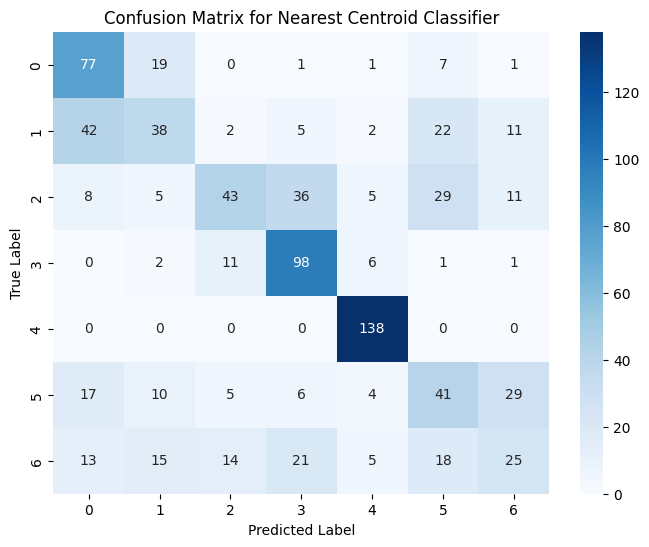

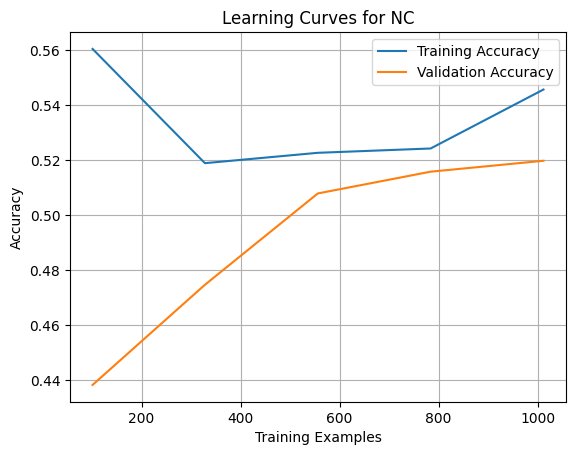

In [ ]:
from sklearn.neighbors import NearestCentroid

nearest_centroid = NearestCentroid()

# train
start_time = time()
nearest_centroid.fit(X_train, y_train)
end_time = time()
training_time_centroid = end_time - start_time

# Make predictions
y_pred_centroid = nearest_centroid.predict(X_test)

# Evaluate the model
print("\nEvaluation metrics for Nearest Centroid Classifier:")
print("Training Time (seconds):", training_time_centroid)
print("Accuracy:", accuracy_score(y_test, y_pred_centroid))
precision_centroid = precision_score(y_test, y_pred_centroid, average='weighted')
recall_centroid = recall_score(y_test, y_pred_centroid, average='weighted')
f1_centroid = f1_score(y_test, y_pred_centroid, average='weighted')

print(f"Precision (weighted): {precision_centroid:.4f}")
print(f"Recall (weighted): {recall_centroid:.4f}")
print(f"F1-Score (weighted): {f1_centroid:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_centroid))

cm_centroid = confusion_matrix(y_test, y_pred_centroid)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_centroid, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Nearest Centroid Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')


    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Learning Curves for {model_name}")
    plt.grid()
    plt.show()

# Plot learning curves
plot_learning_curve(nearest_centroid, X_train, y_train, "NC")



<Figure size 800x800 with 0 Axes>

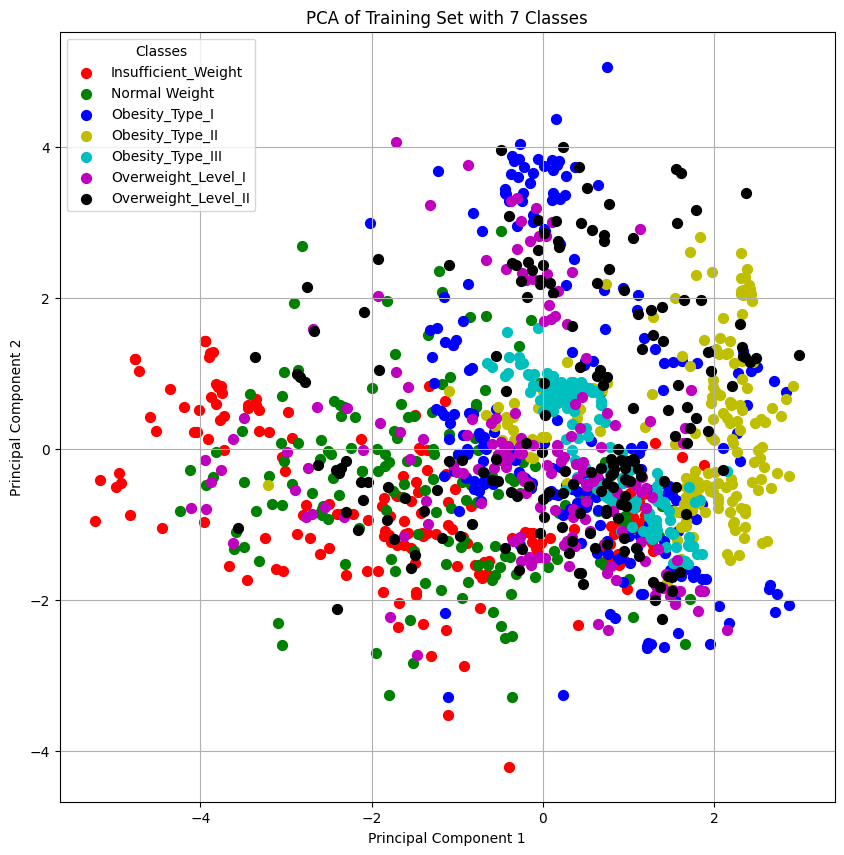

PCA Loadings for PC1 and PC2:
                                     PC1       PC2
Age                             0.198183  0.561537
Gender                          0.326641 -0.211850
Height                          0.449886 -0.304217
Weight                          0.463551  0.008473
CALC                           -0.142483  0.028360
FAVC                            0.260167  0.074571
FCVC                           -0.040565  0.016771
NCP                             0.172806 -0.179578
SCC                            -0.219595 -0.082026
SMOKE                           0.042085  0.059645
CH2O                            0.191930 -0.202815
family_history_with_overweight  0.379399  0.100470
FAF                             0.057472 -0.356864
TUE                            -0.046922 -0.332220
CAEC                            0.232709  0.080301
MTRANS                         -0.163781 -0.450109


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(X_train_scaled)

pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Make sure y_train is a numpy array to avoid alignment issues
y_train_array = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

class_names = ["Insufficient_Weight", "Normal Weight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"]

 # results
plt.figure(figsize=(8, 8))


colors = ["r", "g", "b", "y", "c", "m", "k"]  # Adjust color palette
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Scatter plot for each class
for i in range(len(class_names)):
    mask = (y_train_array == i)
    ax.scatter(pca_data[mask]['PC1'],
               pca_data[mask]['PC2'],
               c=colors[i % len(colors)],
               label=class_names[i],
               s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.title('PCA of Training Set with 7 Classes')
plt.legend(title='Classes')
plt.grid()
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train.columns)
print("PCA Loadings for PC1 and PC2:")
print(loadings)


# **Δημιουργία και Εκπαίδευση Νευρωνικού Δικτύου**

In [ ]:
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import KFold

In [ ]:
data = data.values  # Μετατροπή του DataFrame σε NumPy array
obesity = obesity.values  # Μετατροπή της μεταβλητής στόχου σε NumPy array

# Μετατροπή της μεταβλητής στόχου σε one-hot encoding
output_dim = len(np.unique(obesity))
obesity = to_categorical(obesity, num_classes=output_dim)

NameError: name 'data' is not defined

In [ ]:
epochs = 100
#batch_size = 32

def create_model(output_dim):
    # Παράμετροι του νευρωνικού δικτύου
    input_dim = data.shape[1]  # Ο αριθμός χαρακτηριστικών
    hidden_units = 100  # Νευρώνες ανά κρυφό επίπεδο


    #learning_rate = 0.0001
    activation = 'sigmoid'

    #activation1 = 'relu'
    #activation2 = 'sigmoid'

    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(hidden_units, activation))
    model.add(Dense(hidden_units, activation))

    # for _ in range(3):
    #   model.add(Dense(hidden_units, activation = 'relu'))
    # for _ in range(3):
    #   model.add(Dense(hidden_units, activation = 'tanh'))

    # for _ in range(3):
    #   model.add(Dense(hidden_units, activation = 'swish'))


    #Προσθήκη 10 κρυφών επιπέδων
    # for _ in range(10):
    #     model.add(Dense(hidden_units, activation))


    model.add(Dense(7,activation='softmax'))

    #optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Average Training Time: 18.40 seconds
Average Training Loss: 0.2561
Average Training Accuracy: 0.9057
Average Loss: 0.3314
Average Accuracy: 0.8768


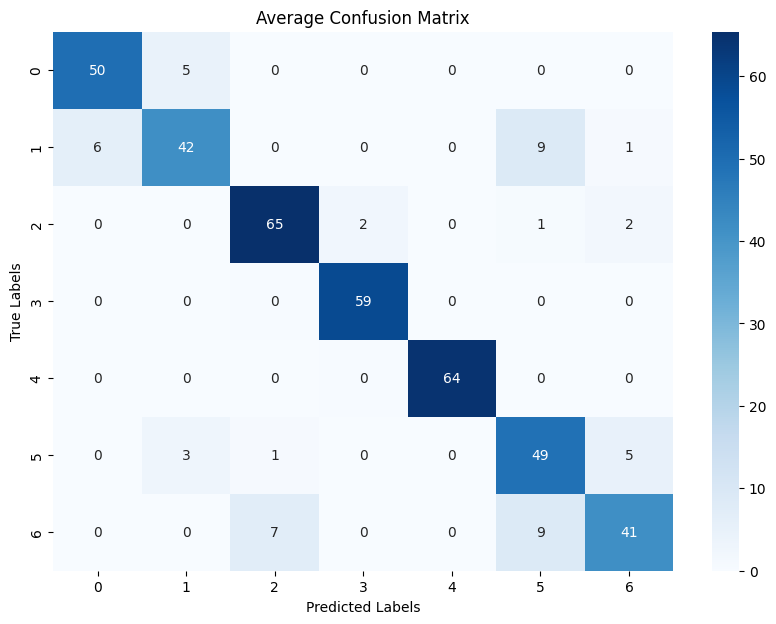

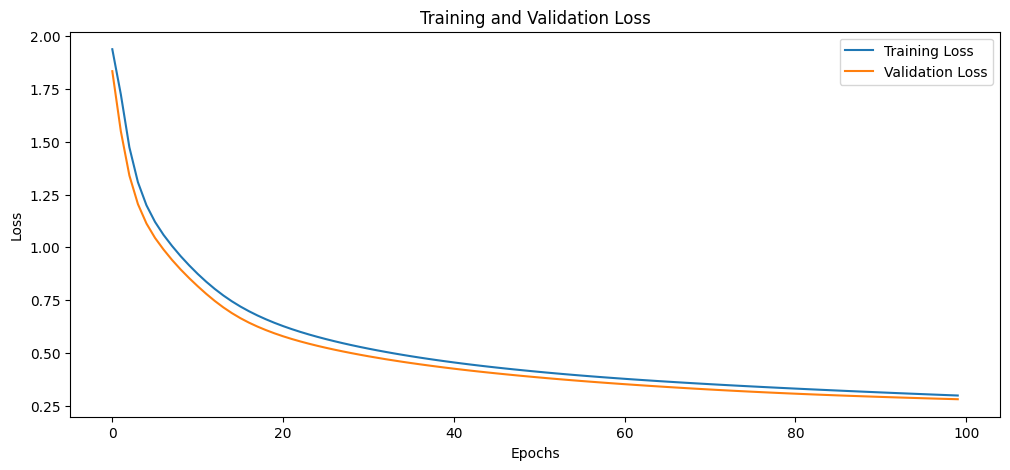

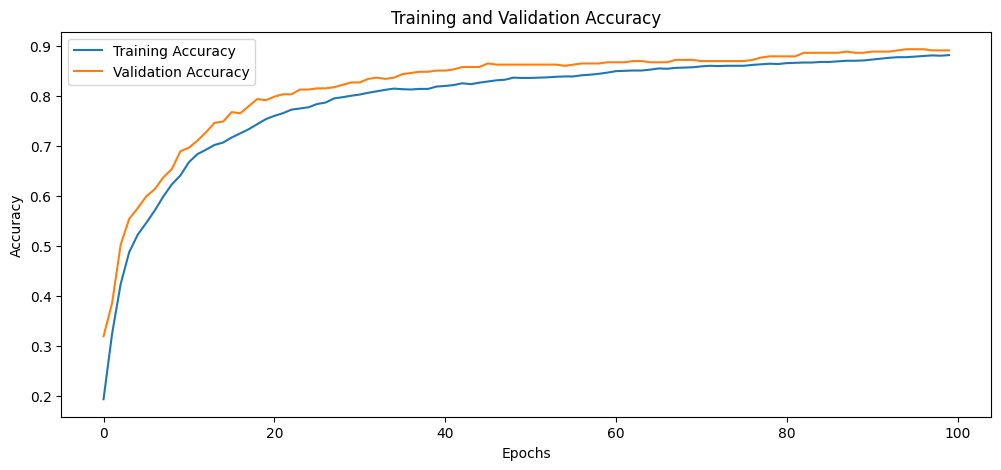

In [ ]:
# Εφαρμογή K-Fold Cross-Validation
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
conf_matrices = []
losses = []
accuracies = []
train_losses = []
train_accuracies = []
training_times = []

for train_index, test_index in kf.split(data):
    model = create_model(output_dim)
    start_time = time.time()
    history = model.fit(data[train_index], obesity[train_index],
                    epochs=epochs, #batch_size = batch_size,
                    validation_data=(data[test_index], obesity[test_index]),
                    verbose=0)
    end_time = time.time()

    training_time = end_time - start_time
    training_times.append(training_time)

    # Αξιολόγηση στο training set
    train_loss, train_accuracy = model.evaluate(data[train_index], obesity[train_index], verbose=0)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Αξιολόγηση του μοντέλου
    loss, accuracy = model.evaluate(data[test_index], obesity[test_index], verbose=0)
    losses.append(loss)
    accuracies.append(accuracy)

    # Προβλέψεις και υπολογισμός confusion matrix
    predictions = model.predict(data[test_index])
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(obesity[test_index], axis=1)
    cm = confusion_matrix(true_classes, predicted_classes)
    conf_matrices.append(cm)


# Υπολογισμός μέσου όρου των confusion matrices, accuracy και loss
average_cm = np.mean(conf_matrices, axis=0)
average_train_loss = np.mean(train_losses)
average_train_accuracy = np.mean(train_accuracies)
average_loss = np.mean(losses)
average_accuracy = np.mean(accuracies)
average_training_time = np.mean(training_times)

print(f"Average Training Time: {average_training_time:.2f} seconds")
print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")
print(f"Average Loss: {average_loss:.4f}")
print(f"Average Accuracy: {average_accuracy:.4f}")

# Εμφάνιση του συνολικού confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt=".0f", cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Σχεδίαση των καμπυλών απώλειας
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Σχεδίαση των καμπυλών ακρίβειας
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# **Δημιουργία και επιλογή καλύτερου SVM**

In [ ]:
import time
import tensorflow as tf
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import random

In [ ]:
data = data.values  # Μετατροπή του DataFrame σε NumPy array
obesity = obesity.values  # Μετατροπή της μεταβλητής στόχου σε NumPy array

Average Training Accuracy: 0.9879
Average Test Accuracy: 0.9583
Average Training Time: 5.39 seconds
Average Support Vectors per class: [34.2 69.2 45.2 17.6  9.  85.  69.4]


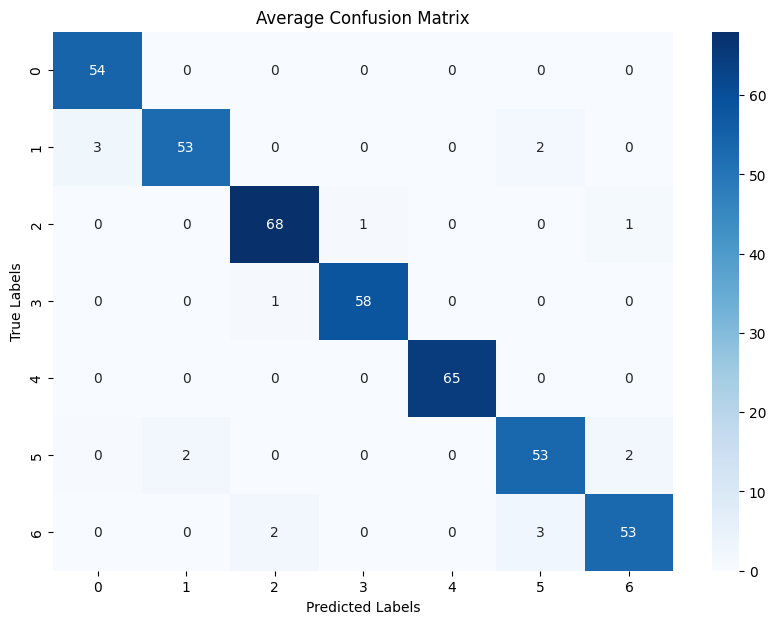

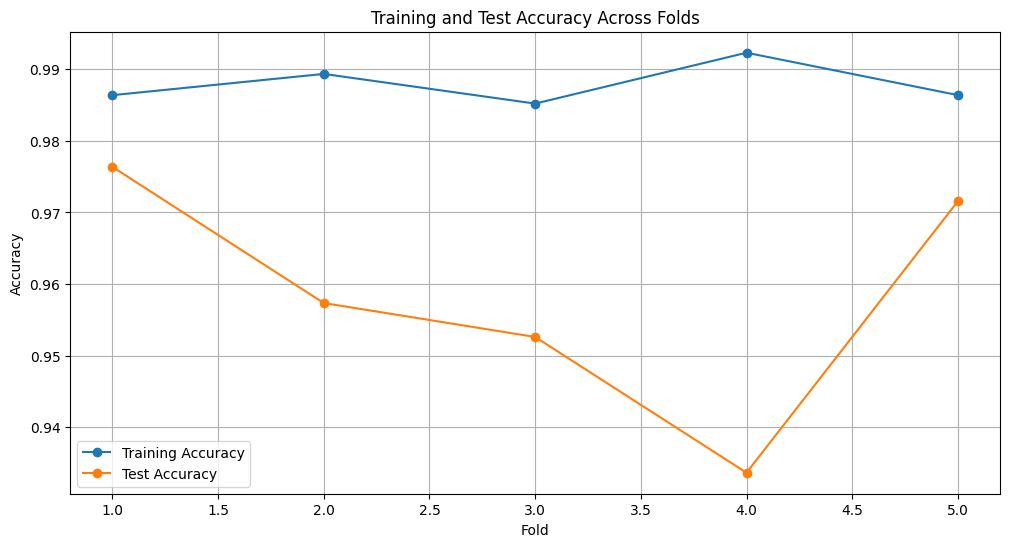

In [ ]:
n_features = data.shape[1]

# Παράμετροι του SVM
kernel = 'poly'
C = 2
decision_function_shape = 'ovr'  # one-vs-all
gamma = 0.05
degree = 2

# Εφαρμογή K-Fold Cross-Validation
np.random.seed(42)
random.seed(42)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_accuracies = []
test_accuracies = []
training_times = []
conf_matrices = []
sv = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = obesity[train_index], obesity[test_index]

    # Create and train the SVM model
    model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, decision_function_shape=decision_function_shape)

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Training time
    training_time = end_time - start_time
    training_times.append(training_time)

    # Training accuracy
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Test accuracy
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

    # Confusion Matrix
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    conf_matrices.append(cm)

    # Support Vectors
    num_sv_per_class = model.n_support_
    sv.append(num_sv_per_class)

# Αποτελέσματα
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_training_time = np.mean(training_times)
average_sv = np.mean(sv, axis=0)

print(f"Average Training Accuracy: {average_train_accuracy:.4f}")
print(f"Average Test Accuracy: {average_test_accuracy:.4f}")
print(f"Average Training Time: {average_training_time:.2f} seconds")
print(f"Average Support Vectors per class: {average_sv}")

# confusion matrix
average_cm = np.mean(conf_matrices, axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt=".0f", cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Καμπύλες
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_folds + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_folds + 1), test_accuracies, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## **LinearSVC Model**

Average Training Accuracy: 0.7798
Average Test Accuracy: 0.7641
Average Training Time: 0.08 seconds


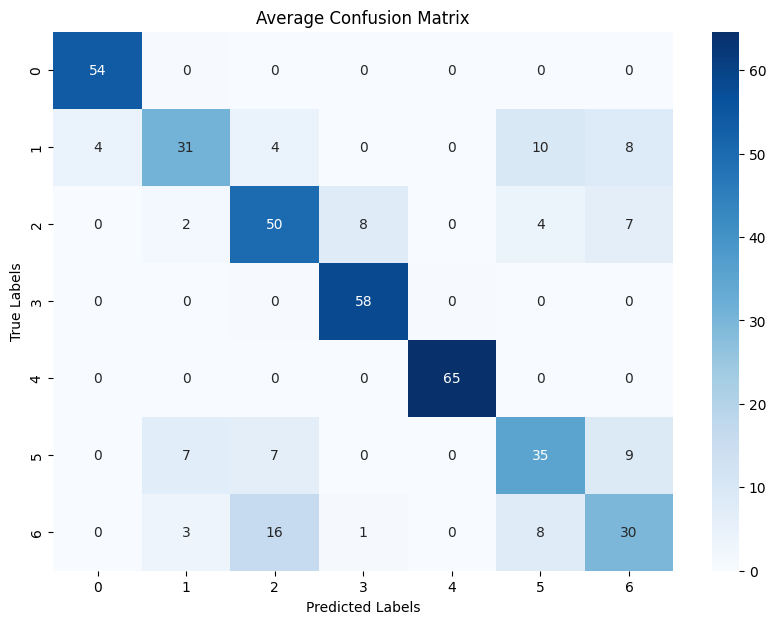

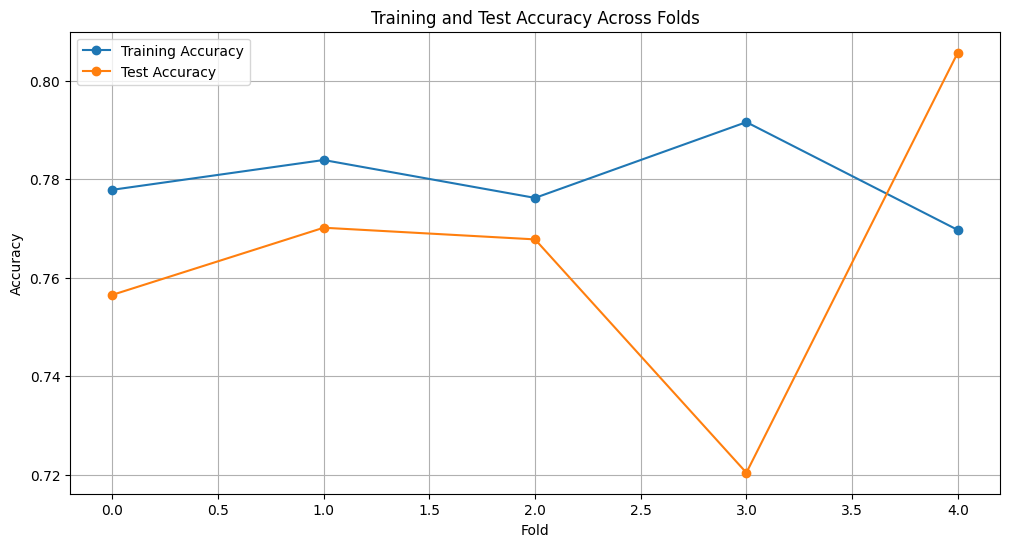

In [ ]:
n_features = data.shape[1]

# Παράμετροι LinearSVC
loss = 'squared_hinge'
C = 10
max_iter = 50
penalty = 'L2'
dual = False
class_weight = None

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_accuracies = []
test_accuracies = []
training_times = []
conf_matrices = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = obesity[train_index], obesity[test_index]

    # Create and train the LinearSVC model
    model = LinearSVC(loss= loss, C=C, max_iter=max_iter, dual=dual, class_weight = class_weight)

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # training time
    training_time = end_time - start_time
    training_times.append(training_time)

    # train set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    conf_matrices.append(cm)


# Αποτελέσματα
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_training_time = np.mean(training_times)

print(f"Average Training Accuracy: {average_train_accuracy:.4f}")
print(f"Average Test Accuracy: {average_test_accuracy:.4f}")
print(f"Average Training Time: {average_training_time:.2f} seconds")

# confusion matrix
average_cm = np.mean(conf_matrices, axis=0)
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt=".0f", cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Καμπύλες
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **MLP**

In [ ]:
data = data.values  # Μετατροπή του DataFrame σε NumPy array
obesity = obesity.values  # Μετατροπή της μεταβλητής στόχου σε NumPy array

# Μετατροπή της μεταβλητής στόχου σε one-hot encoding
output_dim = len(np.unique(obesity))
obesity = to_categorical(obesity, num_classes=output_dim)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Average Training Accuracy: 0.8032
Average Test Accuracy: 0.7793
Average Training Time: 25.87 seconds


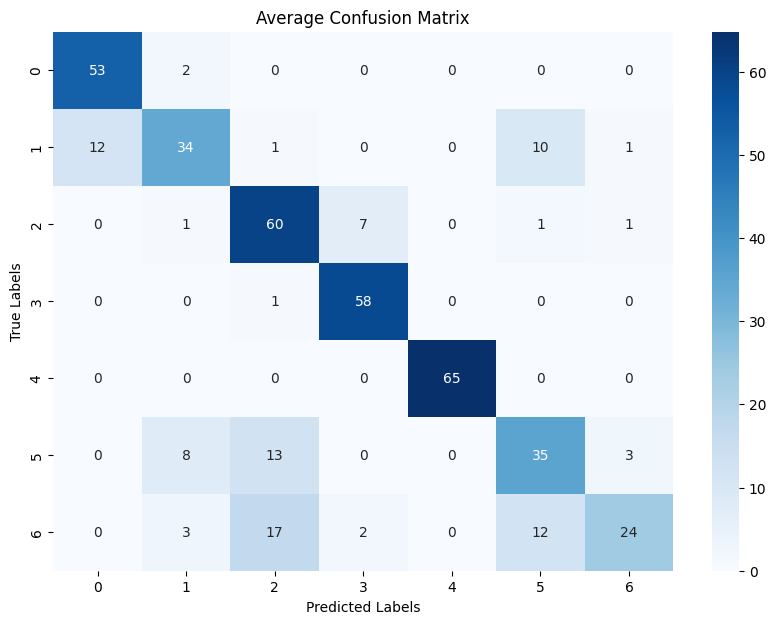

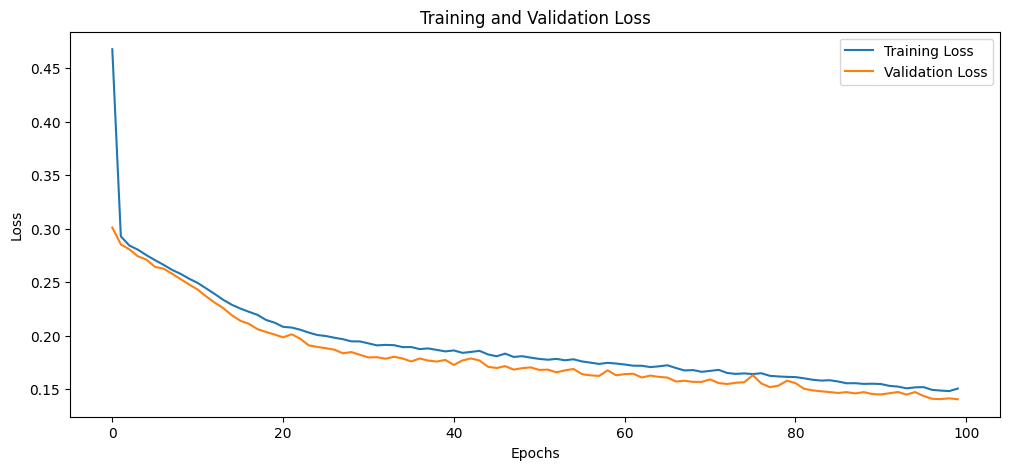

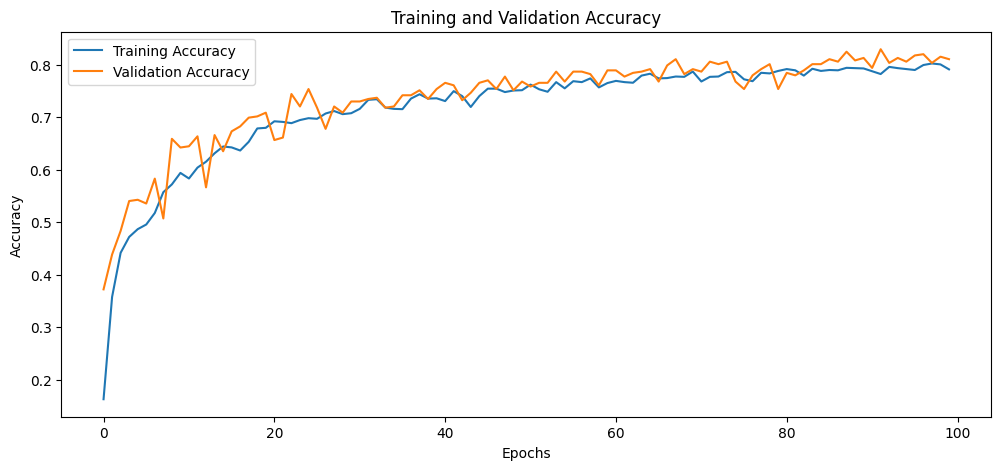

In [ ]:
from tensorflow.keras.losses import hinge

# Παράμετροι
num_folds = 5
epochs = 100
hidden_units = 1
input_dim = data.shape[1]
output_dim = obesity.shape[1]

def create_hinge_mlp(input_dim, hidden_units, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(hidden_units, activation='sigmoid'),
        Dense(output_dim, activation='linear')
    ])
    model.compile(optimizer=Adam(),loss=hinge, metrics=['accuracy'])
    return model

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_accuracies = []
test_accuracies = []
training_times = []
conf_matrices = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = obesity[train_index], obesity[test_index]

    # Δημιουργία και εκπαίδευση του μοντέλου
    model = create_hinge_mlp(input_dim, hidden_units, output_dim)

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    end_time = time.time()

    # training time
    training_times.append(end_time - start_time)

    # training set
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    train_accuracies.append(train_accuracy)

    # test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_accuracy)


    y_test_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_test_true, y_test_pred)
    conf_matrices.append(cm)

# Μέσοι όροι απόδοσης
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_training_time = np.mean(training_times)
average_cm = np.mean(conf_matrices, axis=0)


print(f"Average Training Accuracy: {average_train_accuracy:.4f}")
print(f"Average Test Accuracy: {average_test_accuracy:.4f}")
print(f"Average Training Time: {average_training_time:.2f} seconds")

# confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt=".0f", cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# καμπύλες
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


## **MLP με One vs All**

In [ ]:
from tensorflow.keras.losses import hinge
from sklearn.metrics import confusion_matrix, accuracy_score

# Παράμετροι
num_folds = 5
epochs = 100
hidden_units = 1
input_dim = data.shape[1]
output_dim = obesity.shape[1]  # Αριθμός κατηγοριών

# Δημιουργία μοντέλου One-vs-All
def create_hinge_mlp(input_dim, hidden_units):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(hidden_units, activation='sigmoid'),
        Dense(1, activation='linear')  # Output για binary classification
    ])
    model.compile(optimizer=Adam(), loss=hinge, metrics=['accuracy'])
    return model

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

overall_train_accuracies = []
overall_test_accuracies = []
overall_training_times = []
overall_conf_matrices = []

# One-vs-All: Δημιουργία ξεχωριστού μοντέλου για κάθε κατηγορία
for class_idx in range(output_dim):
    print(f"\nTraining OvR Model for Class {class_idx}...")

    train_accuracies = []
    test_accuracies = []
    training_times = []
    conf_matrices = []

    # Δημιουργία binary labels για την τρέχουσα κατηγορία
    binary_labels = (obesity[:, class_idx] == 1).astype(int)

    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = binary_labels[train_index], binary_labels[test_index]

        # Δημιουργία και εκπαίδευση του μοντέλου
        model = create_hinge_mlp(input_dim, hidden_units)

        start_time = time.time()
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
        end_time = time.time()

        # Training time
        training_times.append(end_time - start_time)

        # Evaluation on training set
        train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        train_accuracies.append(train_accuracy)

        # Evaluation on test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        test_accuracies.append(test_accuracy)

        # Confusion matrix
        y_test_pred = (model.predict(X_test) > 0).astype(int)
        cm = confusion_matrix(y_test, y_test_pred)
        conf_matrices.append(cm)

    # Μέσοι όροι για την κατηγορία
    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)
    average_training_time = np.mean(training_times)
    average_cm = np.mean(conf_matrices, axis=0)

    overall_train_accuracies.append(average_train_accuracy)
    overall_test_accuracies.append(average_test_accuracy)
    overall_training_times.append(average_training_time)
    overall_conf_matrices.append(average_cm)

# Συνολικά αποτελέσματα
print("\nOverall Results (One-vs-All):")
for class_idx in range(output_dim):
    print(f"Class {class_idx}: Train Accuracy = {overall_train_accuracies[class_idx]:.4f}, "
          f"Test Accuracy = {overall_test_accuracies[class_idx]:.4f}, "
          f"Training Time = {overall_training_times[class_idx]:.2f} seconds")



Training OvR Model for Class 0...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Training OvR Model for Class 1...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Training OvR Model for Class 2...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Training OvR Model for Class 3...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Training OvR Model for Class 4...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

# **RBF Νευρωνικό Δίκτυο**

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Layer, Input
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.initializers import RandomUniform, Constant
import tensorflow.keras.backend as K

In [ ]:
data = data.values  # Μετατροπή του DataFrame σε NumPy array
obesity = obesity.values  # Μετατροπή της μεταβλητής στόχου σε NumPy array

# Μετατροπή της μεταβλητής στόχου σε one-hot encoding
output_dim = len(np.unique(obesity))
obesity = to_categorical(obesity, num_classes=output_dim)

In [ ]:
# Initializer
class InitCentersRandom:
    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        idx = np.random.choice(self.X.shape[0], size=shape[0], replace=False)
        return self.X[idx, :]

class InitCentersKMeans:
    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        km = KMeans(n_clusters=shape[0], max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_

class InitCentersPCA:
    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        pca = PCA(n_components=shape[0])
        pca.fit(self.X)
        return pca.components_


In [ ]:
# Custom RBF Layer
class RBFLayer(Layer):
    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer

    def build(self, input_shape):
        self.centers = self.add_weight(
            name='centers',
            shape=(self.output_dim, input_shape[-1]),
            initializer=self.initializer,
            trainable=True
        )
        self.betas = self.add_weight(
            name='betas',
            shape=(self.output_dim,),
            initializer=Constant(value=self.init_betas),
            trainable=True
        )
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        C = K.expand_dims(self.centers)
        H = K.transpose(C - K.transpose(inputs))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

# RBF Neural Network
def create_rbf_model(input_dim, units, optimizer, output_dim, initializer):
    model = Sequential([
        Input(shape=(input_dim,)),
        RBFLayer(units, initializer=initializer, betas=1.0), # εδώ αλλάζω betas
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Average Training Time: 18.40 seconds
Average Training Loss: 0.5071
Average Training Accuracy: 0.8420
Average Test Loss: 0.5761
Average Test Accuracy: 0.7963


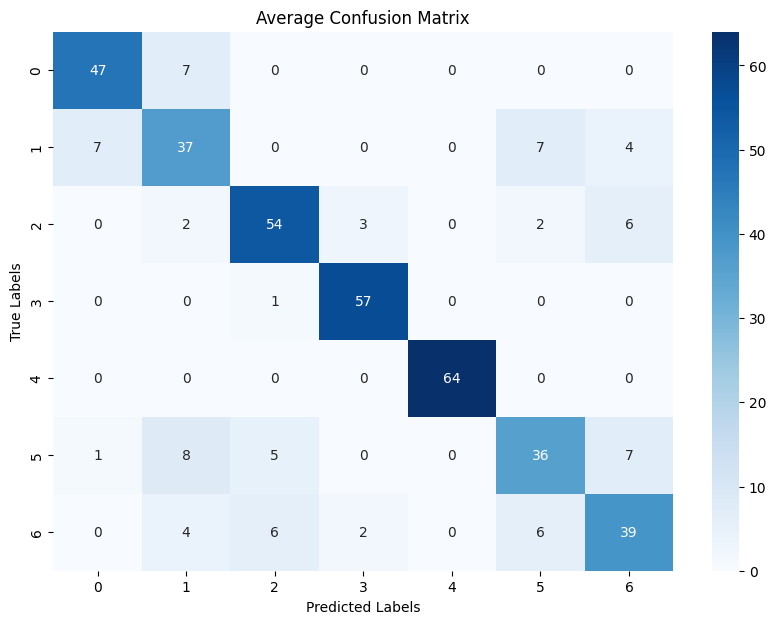

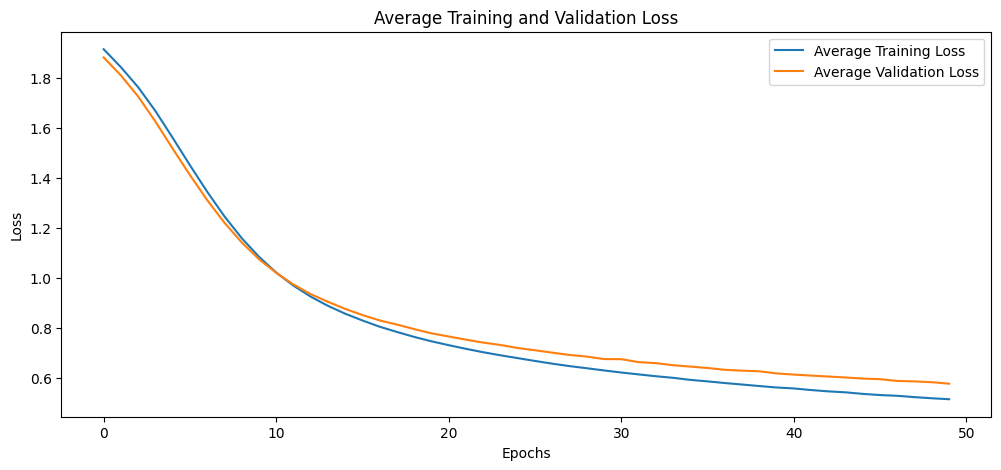

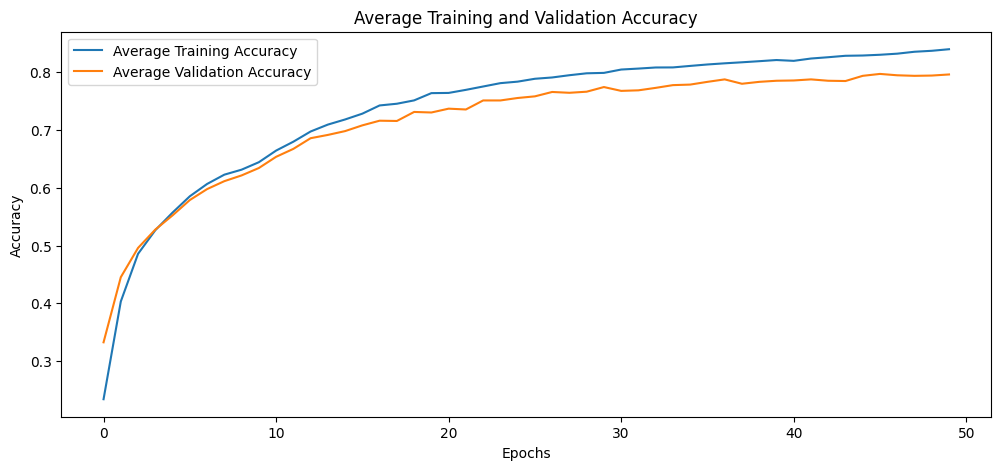

In [ ]:
num_folds = 5
units = 200
optimizer = 'Adam'
epochs = 50
initializer = InitCentersKMeans(data)  # Εναλλακτικά: InitCentersRandom(data) ή InitCentersPCA(data) ή InitCentersKMeans(data)

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []
training_times = []
conf_matrices = []
fold_histories = []  # Αποθήκευση ιστορικού κάθε fold

# Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(data), start=1):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = obesity[train_index], obesity[test_index]

    # Δημιουργία και εκπαίδευση του μοντέλου
    model = create_rbf_model(input_dim=data.shape[1], units=units, optimizer=optimizer, output_dim=obesity.shape[1], initializer=initializer)

    # χρόνος εκπαίδευσης
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_data=(X_test, y_test))
    end_time = time.time()
    training_times.append(end_time - start_time)
    fold_histories.append(history.history)  # Αποθήκευση ιστορικού

    # Training και Test Loss/Accuracy
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Confusion Matrix
    y_test_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_test_true, y_test_pred)
    conf_matrices.append(cm)

# Υπολογισμός Μέσων Όρων
average_cm = np.mean(conf_matrices, axis=0).astype(int)  # Στρογγυλοποίηση στο πλησιέστερο ακέραιο
average_train_loss = np.mean(train_losses)
average_train_accuracy = np.mean(train_accuracies)
average_test_loss = np.mean(test_losses)
average_test_accuracy = np.mean(test_accuracies)
average_training_time = np.mean(training_times)

print(f"Average Training Time: {average_training_time:.2f} seconds")
print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")
print(f"Average Test Loss: {average_test_loss:.4f}")
print(f"Average Test Accuracy: {average_test_accuracy:.4f}")

# Εμφάνιση του συνολικού confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt="d", cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Μέσες καμπύλες απώλειας και ακρίβειας
avg_loss = np.mean([fold['loss'] for fold in fold_histories], axis=0)
avg_val_loss = np.mean([fold['val_loss'] for fold in fold_histories], axis=0)
avg_accuracy = np.mean([fold['accuracy'] for fold in fold_histories], axis=0)
avg_val_accuracy = np.mean([fold['val_accuracy'] for fold in fold_histories], axis=0)

# Σχεδίαση των καμπυλών απώλειας
plt.figure(figsize=(12, 5))
plt.plot(avg_loss, label='Average Training Loss')
plt.plot(avg_val_loss, label='Average Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss')
plt.legend()
plt.show()

# Σχεδίαση των καμπυλών ακρίβειας
plt.figure(figsize=(12, 5))
plt.plot(avg_accuracy, label='Average Training Accuracy')
plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.legend()
plt.show()
